In [1]:
library(tidyverse)

── Attaching core tidyverse packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


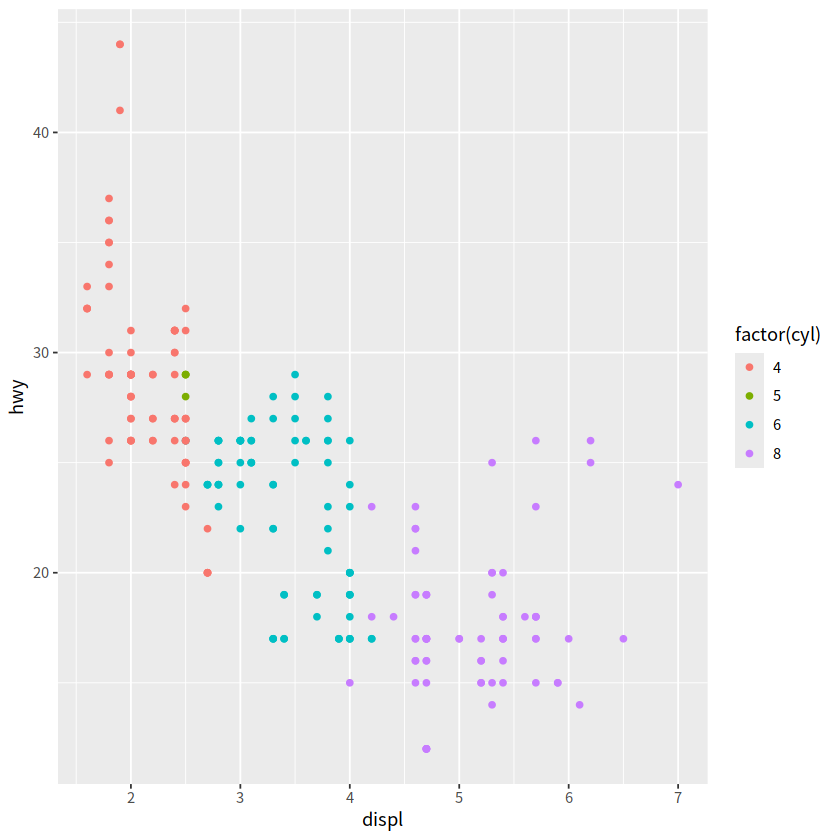

In [2]:
mpg %>% 
  ggplot(aes(x = displ, y = hwy, color = factor(cyl)))+
  geom_point()

如果想调整图例的样式，可以使用`guides()`函数，用法类似`theme`函数, 具体参数为：

- 要么是字符串 (i.e. `"color = colorbar"` or `"color = legend"`),
- 要么是特定的函数 (i.e. `color = guide_colourbar()` or `color = guide_legend()`)

![image.png](image/ggplot2_guides.jpg)

以下 `guides()` 函数族用于控制图例的外观

- `guide_colorbar()`: continuous colors
- `guide_legend()`: discrete values (shapes, colors)
- `guide_axis()`: control axis text/spacing, add a secondary axis
- `guide_bins()`: creates “bins” of values in the legend
- `guide_colorsteps()`: makes colorbar discrete

![image.png](image/guides_examples.png)

## 2 案例详解

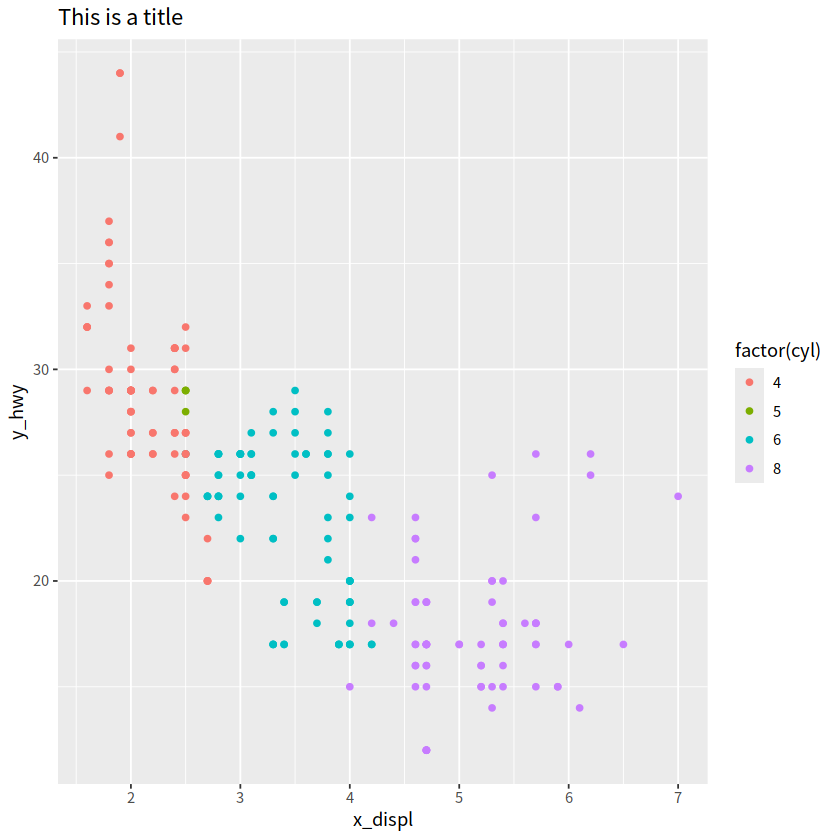

In [27]:
mpg %>% 
  ggplot(aes(x = displ, y = hwy, color = factor(cyl)))+
  geom_point()+
  ggtitle("This is a title")+
  labs(x = "x_displ", y = "y_hwy")+
  guides(color = "legend")

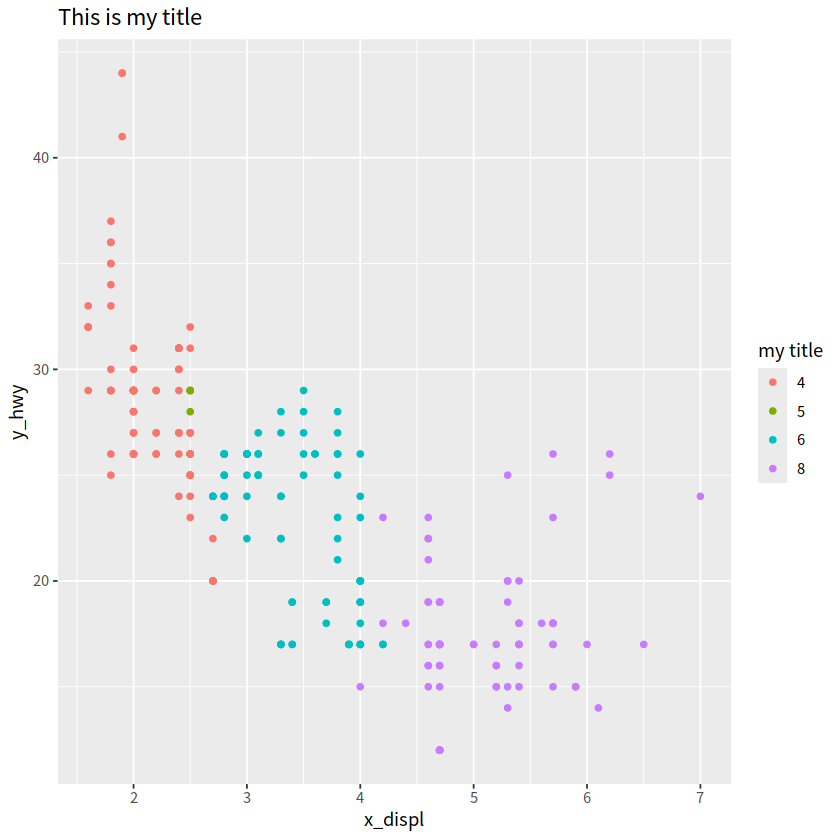

In [12]:
mpg %>%
  ggplot(aes(x = displ, y = hwy, color = factor(cyl))) +
  geom_point() +
  ggtitle("This is my title") +
  labs(x = "x_displ", y = "y_hwy") +
  guides(color = guide_legend(title = "my title",
                              label.hjust = 1))

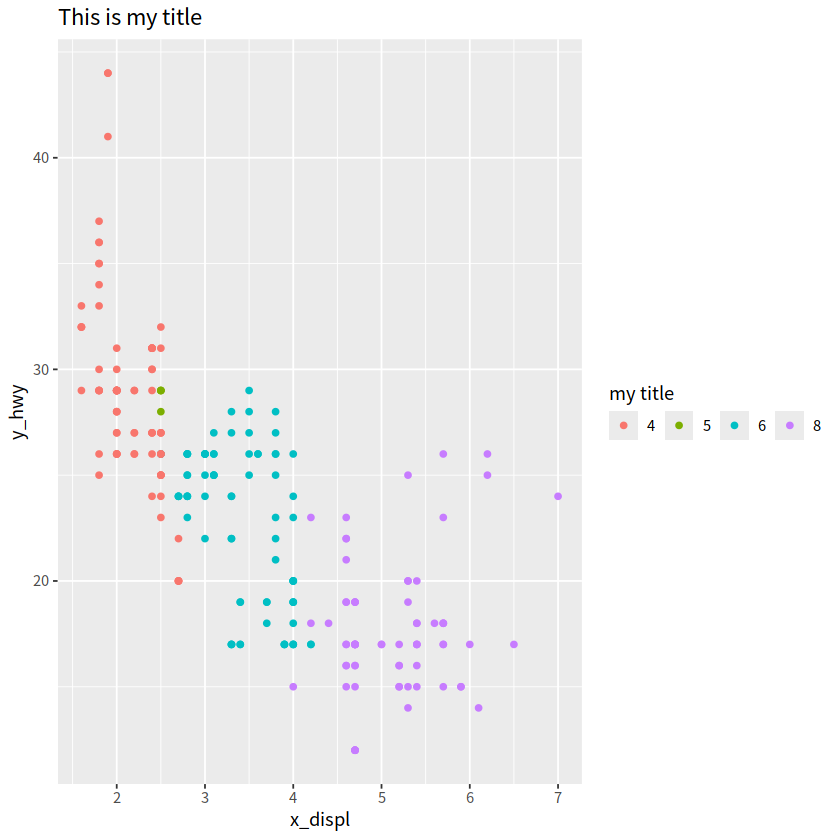

In [9]:
mpg %>%
  ggplot(aes(x = displ, y = hwy, color = factor(cyl))) +
  geom_point() +
  ggtitle("This is my title")  +
  labs(x = "x_displ", y = "y_hwy") +
  guides(color = guide_legend(ncol = 4, 
                              title = "my title"))

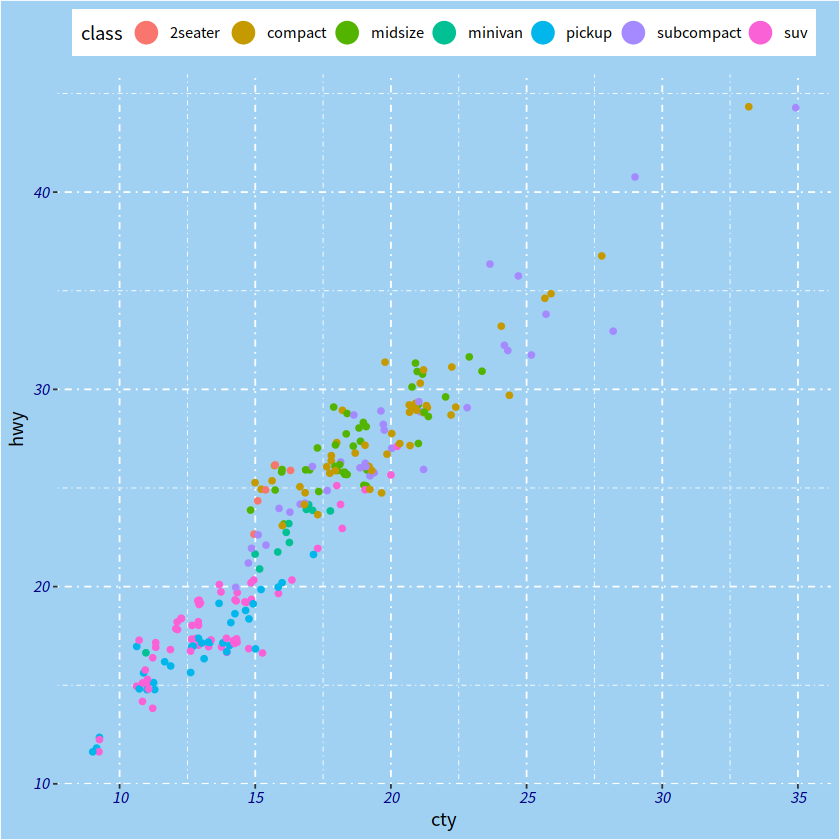

In [19]:
mpg %>%
  ggplot() + 
  geom_jitter(aes(x = cty, y = hwy, color = class),
              key_glyph = draw_key_pointrange)+
  guides(color = guide_legend(nrow = 1))+
  theme(legend.position = "top",
        axis.text = element_text(face = "italic", color = "navy"),
        plot.background = element_rect(fill = "#a0d1f2"),
        panel.background = element_blank(),
        panel.grid = element_line(linetype = "dotdash"))

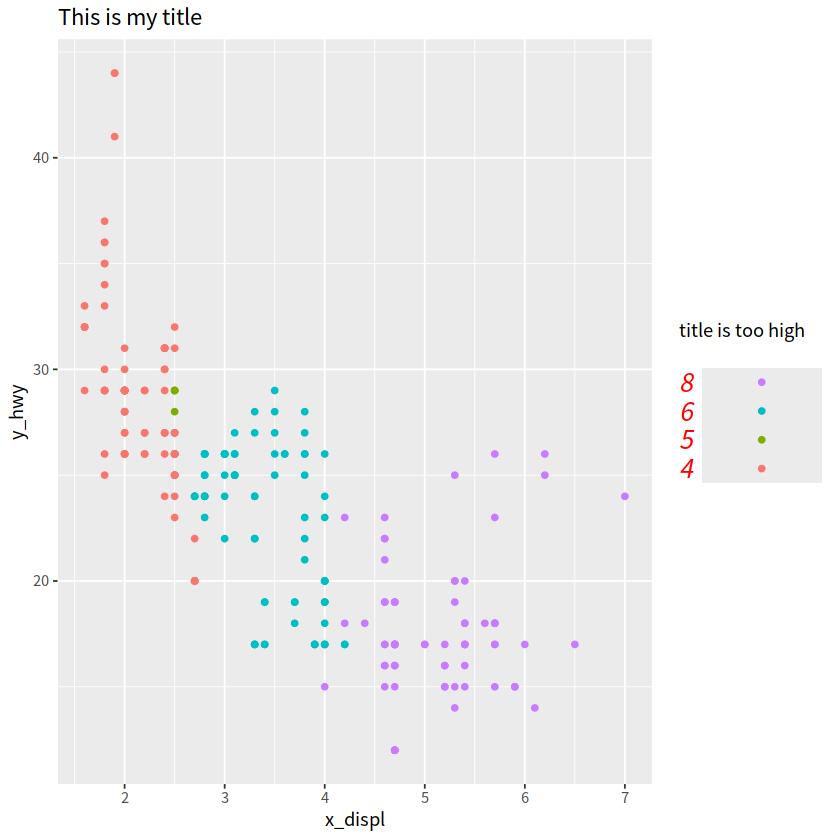

In [21]:
mpg %>%
  ggplot(aes(x = displ, y = hwy, color = factor(cyl))) +
  geom_point() +
  ggtitle("This is my title")  +
  labs(x = "x_displ", y = "y_hwy") +
  guides(color = guide_legend(title = "title is too high",
                              title.position = "top",
                              title.vjust = 5,
                              label.position = "left",
                              label.hjust = 1,
                              label.theme = element_text(size = 15, angle = 0,
                                                         face = "italic",color = "red"),
                              keywidth = 5,
                              reverse = TRUE))

 ## 3 删除其中一个图例
 
 `guides(color = "none)`
 
 `guides(color = guide_none())`

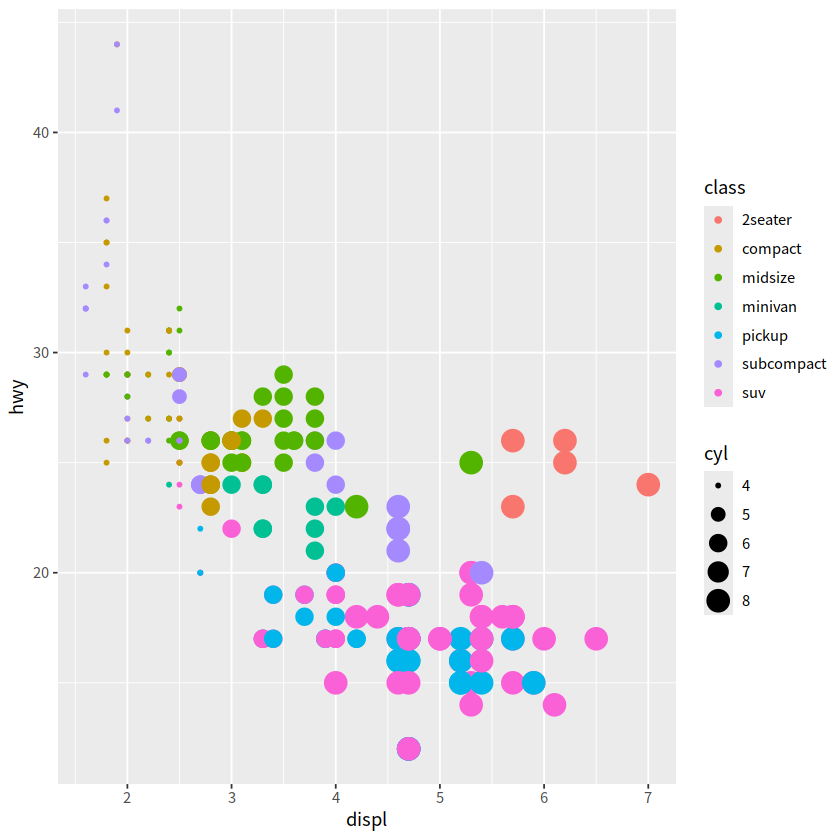

In [22]:
mpg %>% 
  ggplot(aes(x = displ, y = hwy, color = class, size = cyl))+
  geom_point()

比如，我们想删除`size`这个图例，那么需要这样做

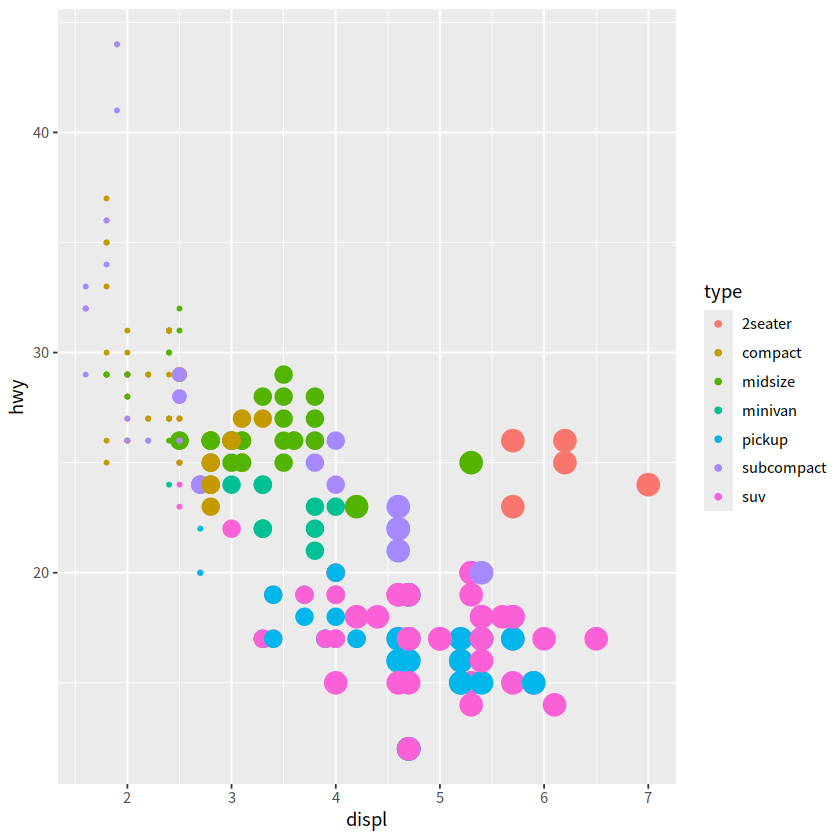

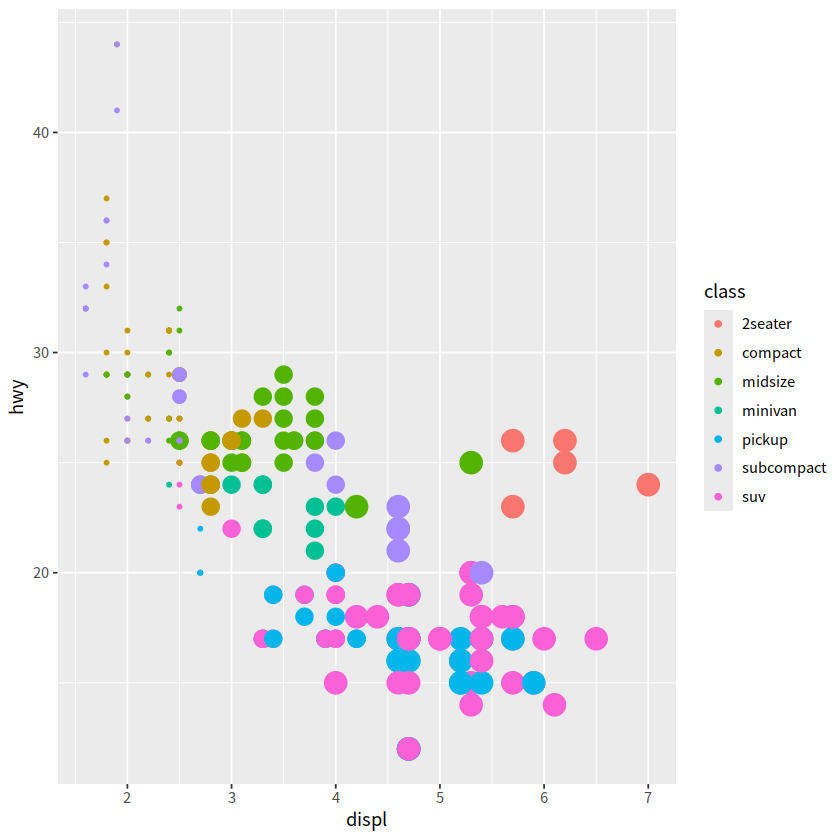

In [25]:
mpg %>% 
  ggplot(aes(x = displ, y = hwy, color = class, size = cyl))+
  geom_point()+
  guides(color = guide_legend("type"),  # keep
         size = "none")                 # remove

mpg %>% 
  ggplot(aes(x = displ, y = hwy, color = class, size = cyl))+
  geom_point()+
  guides(color = guide_legend("class"),  # keep
         size = "none")                 # remove

或者

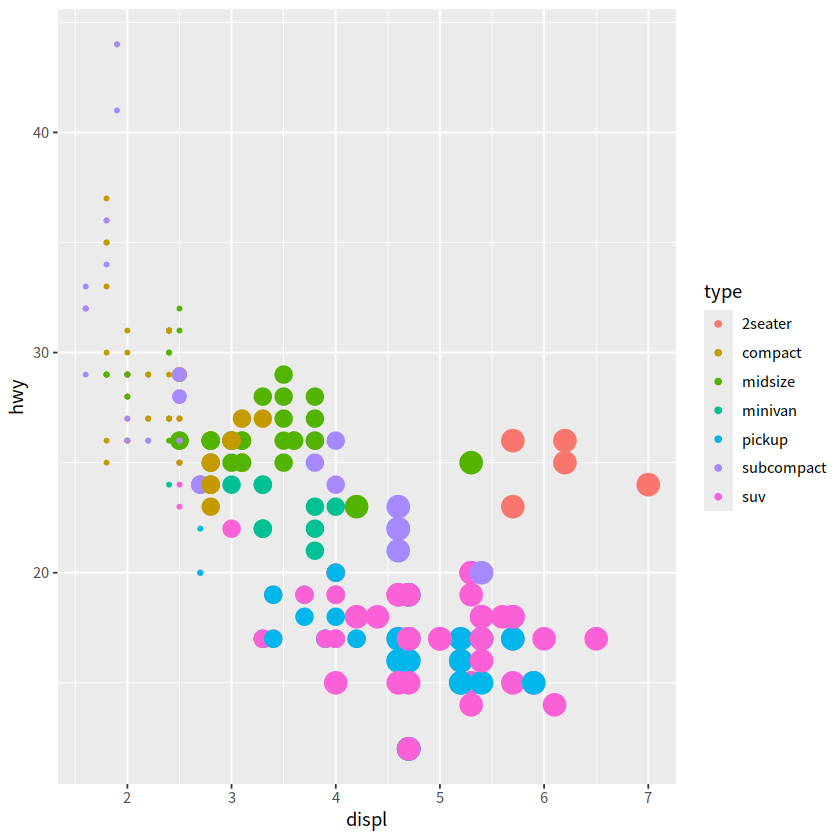

In [26]:
mpg %>%
  ggplot(aes(x = displ, y = hwy, color = class, size = cyl)) +
  geom_point() +
  guides(color = guide_legend("type"),
         size = guide_none())

## 4 合并图例

Warning message:
“Removed 2 rows containing missing values or values outside the scale range (`geom_point()`).”


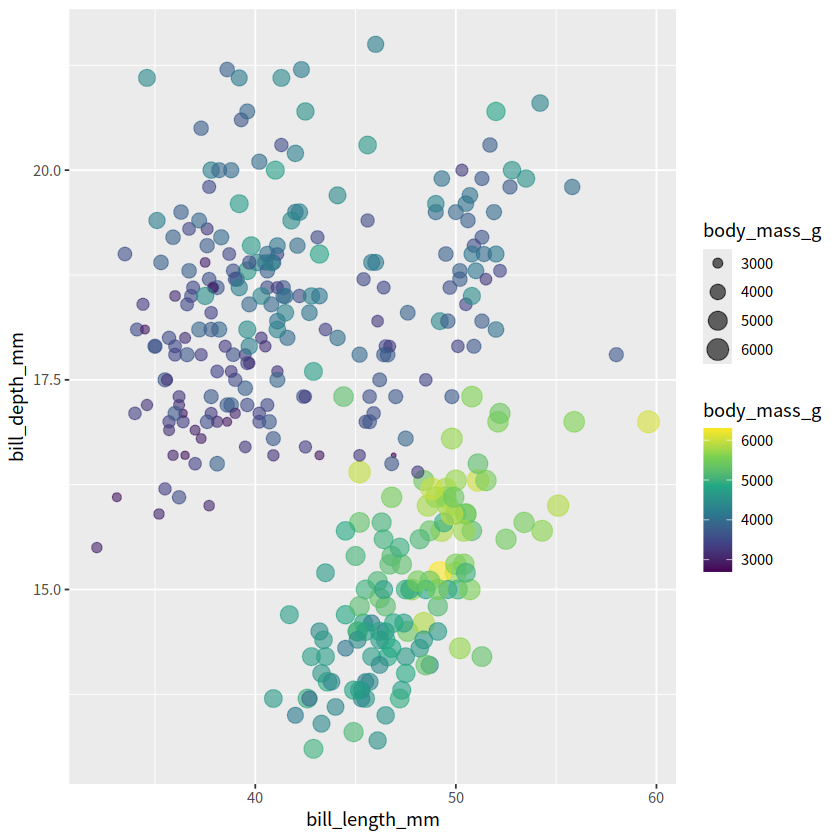

In [28]:
library(tidyverse)
library(palmerpenguins)

penguins %>% 
  ggplot(aes(x = bill_length_mm, y = bill_depth_mm,
             color = body_mass_g, size = body_mass_g))+
  geom_point(alpha = 0.6)+
  scale_color_viridis_c()

这里`color` 和 `size` 都使用了`body_mass_g`映射，我们可以将两者合并

Warning message:
“Removed 2 rows containing missing values or values outside the scale range (`geom_point()`).”


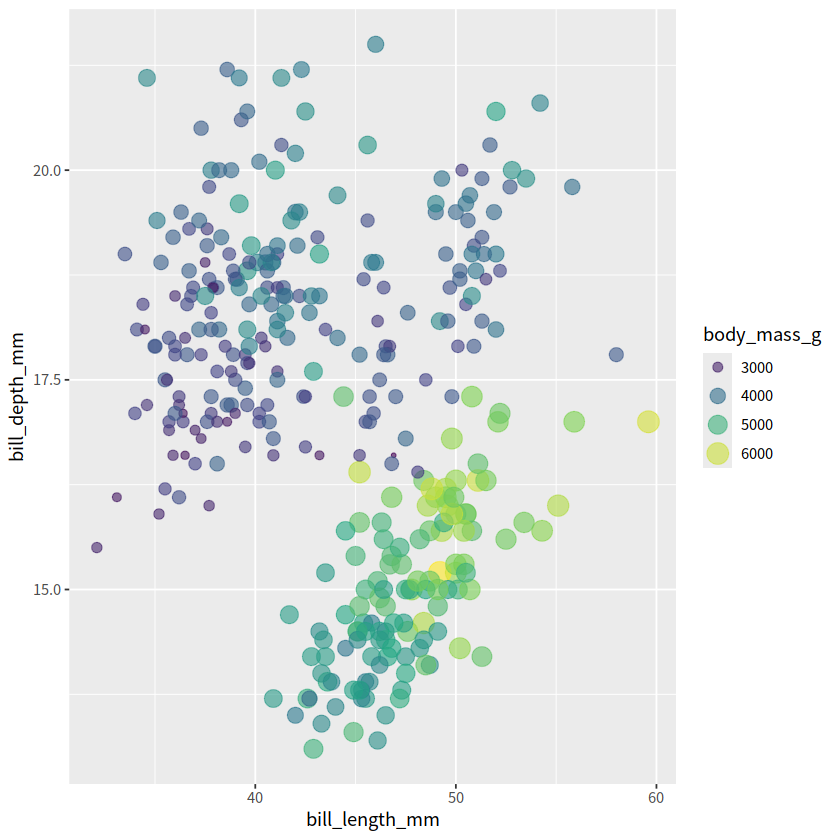

In [31]:
penguins %>% 
  ggplot(aes(x = bill_length_mm, y = bill_depth_mm,
             color = body_mass_g, size = body_mass_g))+
  geom_point(alpha = 0.6)+
  scale_color_viridis_c()+
  guides(color = guide_legend())

更直观的方法

Warning message:
“Removed 2 rows containing missing values or values outside the scale range (`geom_point()`).”


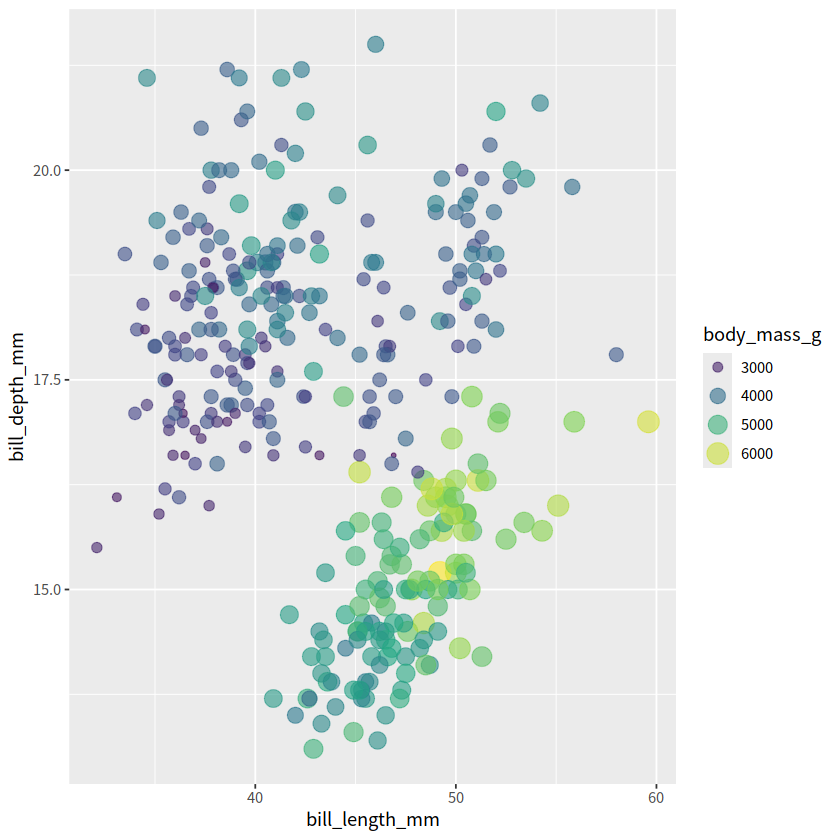

In [32]:
penguins %>% 
  ggplot(aes(x = bill_length_mm, y = bill_depth_mm,
             color = body_mass_g, size = body_mass_g))+
  geom_point(alpha = 0.6)+
  scale_color_viridis_c()+
  guides(color = guide_legend(),
         size  = guide_legend())

或者

Warning message:
“Removed 2 rows containing missing values or values outside the scale range (`geom_point()`).”


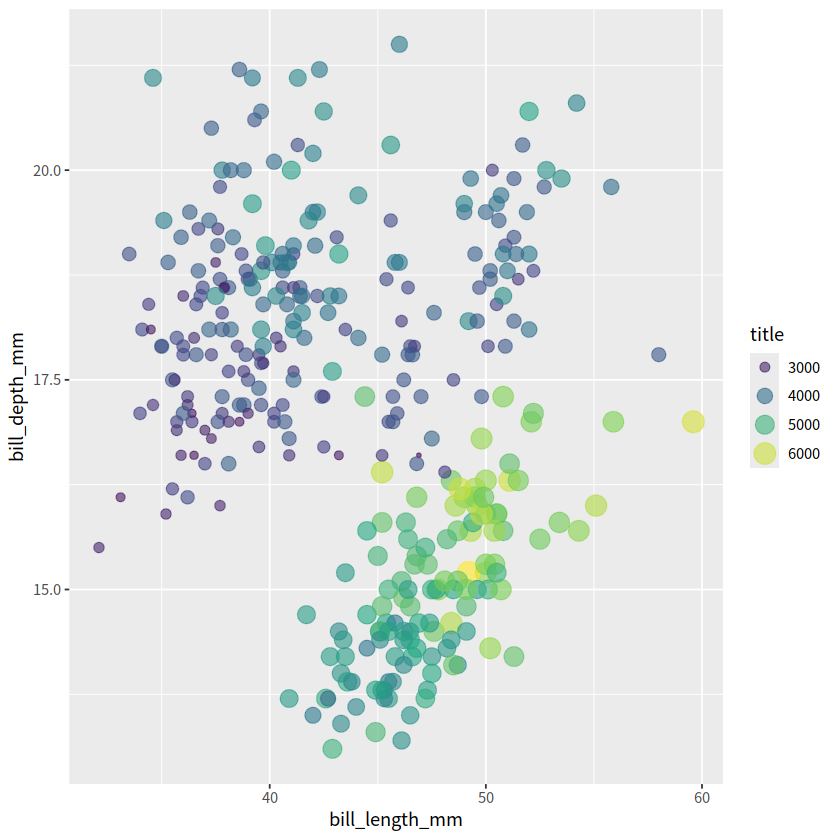

In [34]:
penguins %>% 
  ggplot(aes(x = bill_length_mm, y = bill_depth_mm,
             color = body_mass_g, size = body_mass_g))+
  geom_point(alpha = 0.6)+
  scale_color_viridis_c()+
  guides(color = guide_legend("title"),
         size  = guide_legend("title"))

最省力的是

Warning message:
“Removed 2 rows containing missing values or values outside the scale range (`geom_point()`).”


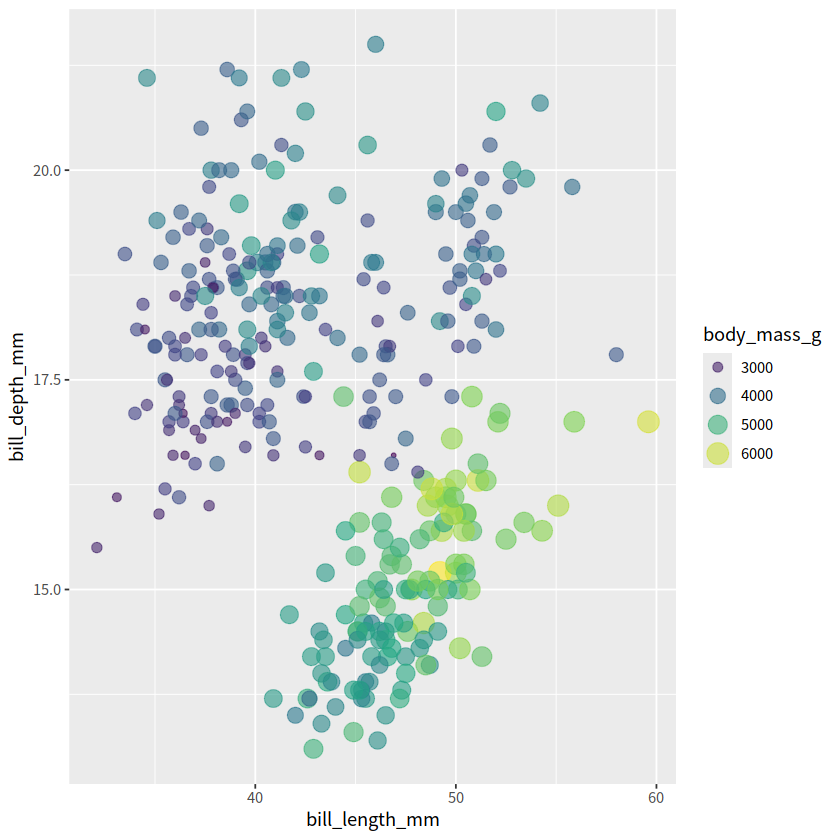

In [35]:
penguins %>% 
  ggplot(aes(x = bill_length_mm, y = bill_depth_mm,
             color = body_mass_g, size = body_mass_g))+
  geom_point(alpha = 0.6)+
  scale_color_viridis_c(guide = "legend")

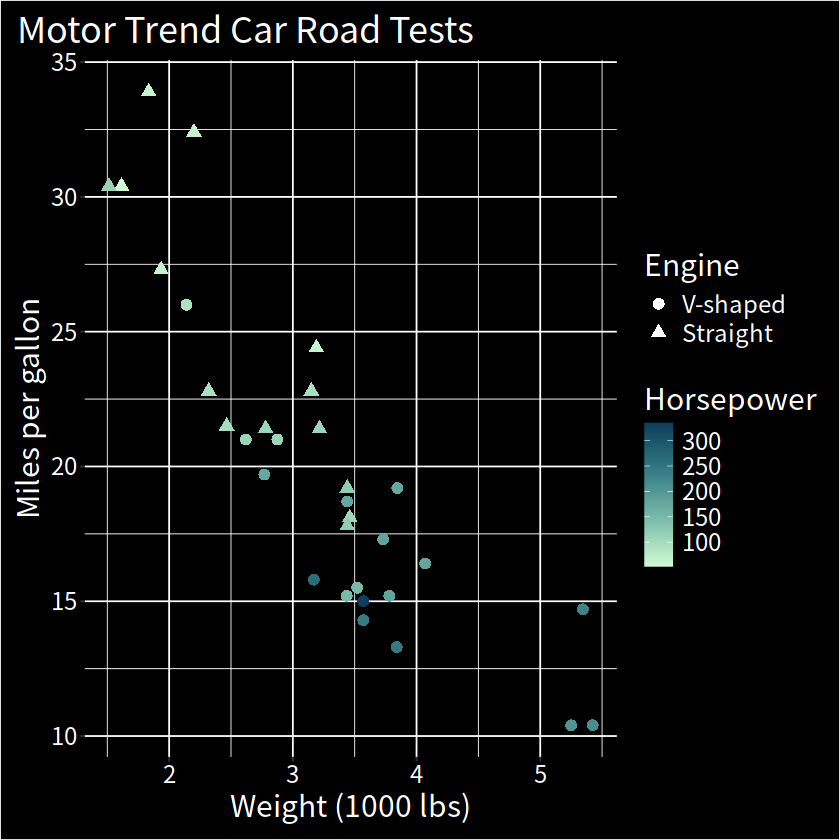

In [36]:
mtcars %>%
  as_tibble() %>%
  ggplot(aes(x = wt, y = mpg, shape = factor(vs), color = hp)) +
  geom_point(size = 3) +
  colorspace::scale_color_continuous_sequential(palette = "Dark Mint") +
  scale_shape_discrete(labels = c("V-shaped", "Straight")) +
  labs(
    x = "Weight (1000 lbs)", y = "Miles per gallon",
    title = "Motor Trend Car Road Tests",
    shape = "Engine", color = "Horsepower"
  ) +
  theme(
    text = element_text(size = 18, color = "white"),
    rect = element_rect(fill = "black"),
    panel.background = element_rect(fill = "black"),
    legend.key = element_rect(fill = "black"),
    axis.text = element_text(color = "white"),
    plot.title.position = "plot",
    plot.margin = margin(10, 10, 10, 10)
  ) +
  guides(
    shape =
      guide_legend(override.aes = list(color = "white"))
  )